In [1]:
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import seaborn as sns


In [14]:
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


**COVID**

In [3]:
img_size = (224,224)
dir_name = 'COVID-19_Image_Database/COVID-19'
img_list = glob.glob(dir_name + '/*')

list_covid = []
for img in img_list:
    temp_img = load_img(img,grayscale=True,target_size=(img_size))
    temp_img_array = img_to_array(temp_img) /255
    list_covid.append(temp_img_array)
list_covid = np.array(list_covid)
list_covid2 = list_covid.reshape(-1,50176)
df_covid=pd.DataFrame(list_covid2)
df_covid['label'] = np.full(df_covid.shape[0],2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [4]:
df_covid.shape

(219, 50177)

NORMAL

In [5]:
img_size = (224,224)
dir_name2 = 'COVID-19_Image_Database/NORMAL'
img_list2 = glob.glob(dir_name2 + '/*')

list_normal = []
for img in img_list2[:150]:
    temp_img = load_img(img,grayscale=True,target_size=(img_size))
    temp_img_array = img_to_array(temp_img) /255
    list_normal.append(temp_img_array)
list_normal = np.array(list_normal)
list_normal2 = list_normal.reshape(-1,50176)
df_normal=pd.DataFrame(list_normal2)
df_normal['label'] = np.full(df_normal.shape[0],0)

In [6]:
df_normal.shape

(150, 50177)

other PNEUMONIA

In [7]:
img_size = (224,224)
dir_name3 = 'COVID-19_Image_Database/Viral_Pneumonia'
img_list3 = glob.glob(dir_name3 + '/*')

list_others = []
for img in img_list3[:150]:
    temp_img = load_img(img,grayscale=True,target_size=(img_size))
    temp_img_array = img_to_array(temp_img) /255
    list_others.append(temp_img_array)
list_others = np.array(list_others)
list_others2 = list_others.reshape(-1,50176)
df_others=pd.DataFrame(list_others2)
df_others['label'] = np.full(df_others.shape[0],1)

In [8]:
df_others.shape

(150, 50177)

show x-ray

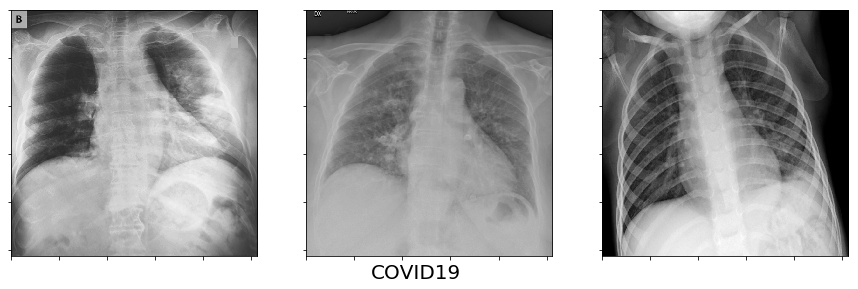

In [9]:
f = plt.figure(figsize=(15,7))
f.suptitle('COVID19',fontsize=20)
f.subplots_adjust(top=2.35)
for i in range(3):
    sp = f.add_subplot(1,3,i+1)
    img = cv2.imread(img_list[i])
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
    plt.imshow(img_gray)
    plt.gray()
plt.show()

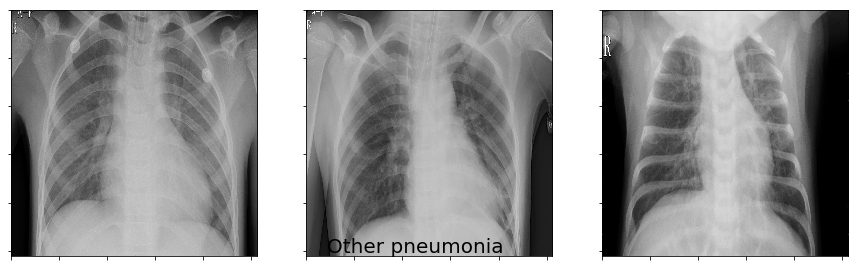

In [10]:
f = plt.figure(figsize=(15,7))
f.suptitle('Other pneumonia',fontsize=20)
f.subplots_adjust(top=2.25)
for i in range(3):
    sp = f.add_subplot(1,3,i+1)
    img = cv2.imread(img_list3[i])
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
    plt.imshow(img_gray)
plt.gray()
plt.show()

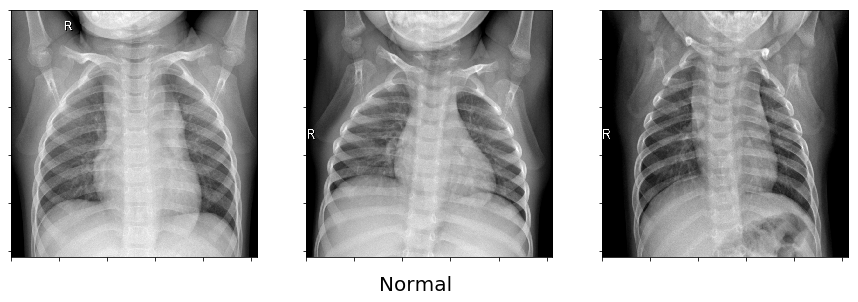

In [11]:
f = plt.figure(figsize=(15,7))
f.suptitle('Normal',fontsize=20)
f.subplots_adjust(top=2.4)
for i in range(3):
    sp = f.add_subplot(1,3,i+1)
    img = cv2.imread(img_list2[i])
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
    plt.imshow(img_gray)
plt.gray()
plt.show()

making Database

In [12]:
Df = pd.concat([df_covid, df_normal , df_others], ignore_index=True)

In [15]:
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.utils import to_categorical

train-validation split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(Df.iloc[:,0:-1], Df.iloc[:,-1], test_size=0.20, random_state=0)

X_train = x_train.values.reshape(-1,224,224,1)
X_test = x_test.values.reshape(-1,224,224,1)
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

CNN

In [17]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Activation

In [18]:
np.random.seed(0)
model = Sequential()

model.add(BatchNormalization(input_shape=(224,224,1)))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0610 13:55:36.586356 4706620864 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 224, 224, 1)       4         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 55, 55, 32)        0

In [20]:
model_chkpt = ModelCheckpoint('best_mod.h5', monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [21]:
history = model.fit(X_train, Y_train, 
          validation_split=0.20,
          epochs=20, batch_size=32, shuffle=True, 
          callbacks=[model_chkpt ,early_stopping]
         )

Train on 332 samples, validate on 83 samples
Epoch 1/20
332/332 [==============================] - 30s 91ms/sample - loss: 3.1407 - acc: 0.4970 - val_loss: 1.0640 - val_acc: 0.7108
Epoch 2/20
332/332 [==============================] - 33s 98ms/sample - loss: 0.6688 - acc: 0.7259 - val_loss: 0.9687 - val_acc: 0.6988
Epoch 3/20
332/332 [==============================] - 38s 116ms/sample - loss: 0.5784 - acc: 0.8163 - val_loss: 0.8425 - val_acc: 0.6145
Epoch 4/20
332/332 [==============================] - 30s 91ms/sample - loss: 0.4571 - acc: 0.8193 - val_loss: 0.8071 - val_acc: 0.6867
Epoch 5/20
332/332 [==============================] - 28s 84ms/sample - loss: 0.3665 - acc: 0.8614 - val_loss: 0.6611 - val_acc: 0.6867
Epoch 6/20
332/332 [==============================] - 28s 83ms/sample - loss: 0.2999 - acc: 0.9036 - val_loss: 0.5939 - val_acc: 0.7831
Epoch 7/20
332/332 [==============================] - 28s 83ms/sample - loss: 0.2851 - acc: 0.8946 - val_loss: 0.5833 - val_acc: 0.7108
Ep

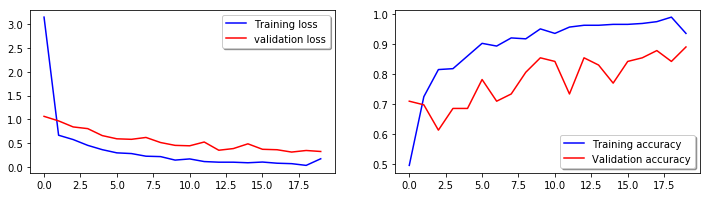

In [22]:
fig, ax = plt.subplots(1,2, figsize=(12, 3))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

<function matplotlib.pyplot.show(*args, **kw)>

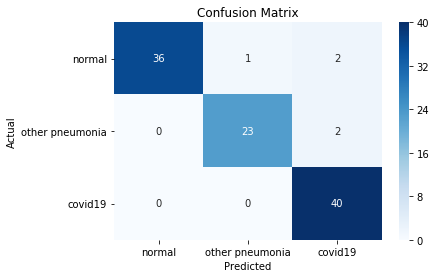

In [23]:
plt.figure()

ax = plt.subplot()

ax.set_title('Confusion Matrix')
pred = model.predict_classes(X_test)
Y_TEST = np.argmax(Y_test, axis =1)
cm = metrics.confusion_matrix(Y_TEST,pred)
classes=['normal', 'other pneumonia', 'covid19']
sns.heatmap(cm, annot=True,xticklabels=classes, yticklabels=classes,cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show

classification report

In [24]:
from sklearn.metrics import classification_report
print(classification_report(Y_TEST, pred))
print('normal = 0 , other pneumonia = 1, covid19 = 2')

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        39
           1       0.96      0.92      0.94        25
           2       0.91      1.00      0.95        40

    accuracy                           0.95       104
   macro avg       0.96      0.95      0.95       104
weighted avg       0.96      0.95      0.95       104

normal = 0 , other pneumonia = 1, covid19 = 2


multiclass ROC

In [25]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

PRED = to_categorical(pred)
y = Df['label'].values
# Binarize the output
y = label_binarize(y, classes=[0,1,2])
n_classes = y.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
       fpr[i], tpr[i], _ = roc_curve(Y_test[:,i], PRED[:,i])
       roc_auc[i] = auc(fpr[i], tpr[i])

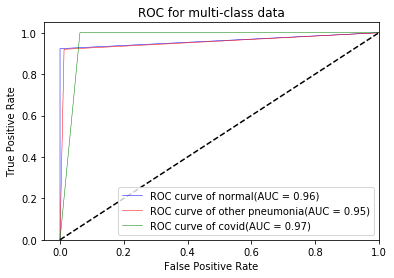

In [26]:
colors = ['blue', 'red', 'green']
cls = {0:'normal', 1:'other pneumonia', 2:'covid'}
for i, color ,c in zip(range(n_classes), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.5,
             label='ROC curve of '+c+ '(AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data')
plt.legend(loc="lower right")
plt.show()

using eigenfaces